# Plotting Your Data - Matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
#We will read in the file survey.csv
cwd = os.getcwd()
file = cwd + "/data/survey.csv"

#read in with pandas
df = pd.read_csv(file, index_col='record_id')

In [3]:
print("The dimensions of the dataframe are:", df.shape)

#since the dataframe is large, let's only view part of the dataframe
df.head()

The dimensions of the dataframe are: (35549, 7)


,month,day,year,plot,species,sex,wgt
record_id,,,,,,,
1,7,16,1977,2,NL,M,NaN
2,7,16,1977,3,NL,M,NaN
3,7,16,1977,2,DM,F,NaN
4,7,16,1977,7,DM,M,NaN
5,7,16,1977,3,DM,M,NaN


In [4]:
# take the first 50 of the ~35000 entries
small_dataset = df[:50]

In [5]:
#There's a column in surveys.csv named "plot" let us use it to make a plot.
plot_data = small_dataset['plot']

#we have an array of plot data indexed by the record_id value
plot_data.head()

record_id
1    2
2    3
3    2
4    7
5    3
Name: plot, dtype: int64

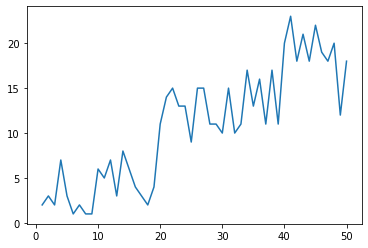

In [6]:
#Let's use matplotlib to plot it and give it a label.
plt.plot(plot_data, label='My Data')

#We can interact with the plot by using plt.show like so:
plt.show()

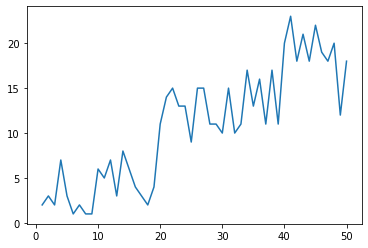

In [7]:
#To save the plot as a png - it should appear in your working directory
plt.plot(plot_data, label='My Data')
plt.savefig('myplot.png')

In [8]:
#Here's a slightly more realistic example

#1. group data by gender 
grouped_plot_data = small_dataset.groupby('sex')

#to get an idea of what it looks like
print(grouped_plot_data.size(), "\n")
list(grouped_plot_data)



sex
F    25
M    22
dtype: int64 



[('F',            month  day  year  plot species sex  wgt
  record_id                                         
  3              7   16  1977     2      DM   F  NaN
  7              7   16  1977     2      PE   F  NaN
  9              7   16  1977     1      DM   F  NaN
  10             7   16  1977     6      PF   F  NaN
  11             7   16  1977     5      DS   F  NaN
  15             7   16  1977     6      DM   F  NaN
  16             7   16  1977     4      DM   F  NaN
  17             7   16  1977     3      DS   F  NaN
  20             7   17  1977    11      DS   F  NaN
  21             7   17  1977    14      DM   F  NaN
  22             7   17  1977    15      NL   F  NaN
  30             7   17  1977    10      DS   F  NaN
  31             7   17  1977    15      DM   F  NaN
  32             7   17  1977    10      DM   F  NaN
  33             7   17  1977    11      DM   F  NaN
  35             7   17  1977    13      DM   F  NaN
  36             7   17  1977    16      

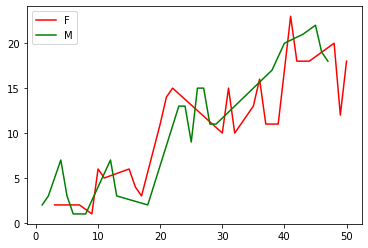

In [9]:
#2. get different colors and labels for each group.
colors = ['r', 'g'] #we'll be cycling through these colors
color_index = 0
for group in grouped_plot_data:
    color = colors[color_index]
    group_label = group[0]
    group_data = group[1]
    plt.plot(group_data['plot'], color=color, label=group_label)
    color_index += 1

plt.legend()
plt.show()

# Plotting Flight Data

In [10]:
#define file location/names
airports_file = cwd + "/data/airports.csv"
airlines_file = cwd + "/data/airlines.csv"
routes_file = cwd + "/data/routes.csv"

#read in data from each file

# Read in the airports data.
airports = pd.read_csv(airports_file)
airports.columns = ["id", "name", "city", "country", "code", "icao", "latitude", "longitude", "altitude", "offset", "dst", "timezone"]

# Read in the airlines data.
airlines = pd.read_csv("./data/airlines.csv", header=None, dtype=str)
airlines.columns = ["id", "name", "alias", "iata", "icao", "callsign", "country", "active"]

# Read in the routes data.
routes = pd.read_csv("./data/routes.csv", header=None, dtype=str)
routes.columns = ["airline", "airline_id", "source", "source_id", "dest", "dest_id", "codeshare", "stops", "equipment"]

In [11]:
#taking a look at each dataframe
airports.head()


,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone
0,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby
1,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10.0,U,Pacific/Port_Moresby
2,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10.0,U,Pacific/Port_Moresby
3,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.220050,146,10.0,U,Pacific/Port_Moresby
4,6,Wewak Intl,Wewak,Papua New Guinea,WWK,AYWK,-3.583828,143.669186,19,10.0,U,Pacific/Port_Moresby


In [12]:
airlines.head()


,id,name,alias,iata,icao,callsign,country,active
0,1,Private flight,\N,-,NaN,NaN,NaN,Y
1,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
3,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N
4,5,213 Flight Unit,\N,NaN,TFU,NaN,Russia,N


In [13]:
routes.head()

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [14]:
#Lets clean to remove unknown airlines
routes = routes[routes["airline_id"] != "\\N"]

#make a histogram showing the distribution of route lengths by airlines
#to do this we get to define our own function!!! yay!

import math

#user-defined funciton
def haversine(lon1, lat1, lon2, lat2):
    # Convert coordinates to floats.
    lon1, lat1, lon2, lat2 = [float(lon1), float(lat1), float(lon2), float(lat2)]
    # Convert to radians from degrees.
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    # Compute distance.
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    km = 6367 * c
    return(km)

In [15]:
"""
another user-defined function: calculates distance between the source and dest 
airports for a single route.

Side-note: this function uses try/except because the function 
could fail if there’s an invalid value in the source_id or dest_id columns, 
to prevent failure in this kind of situation use a try/except block 
to catch problems.
"""

def calc_dist(row):
    dist = 0
    try:
        # Match source and destination to get coordinates.
        source = airports[ airports["id"] == int(row["source_id"]) ].iloc[0]
        dest = airports[ airports["id"] == int(row["dest_id"]) ].iloc[0]

        # Use coordinates to compute distance.
        dist = haversine(dest["longitude"], dest["latitude"], source["longitude"], source["latitude"])
    except (ValueError, IndexError):
        pass
    
    return(dist)


Code below takes several minutes to run

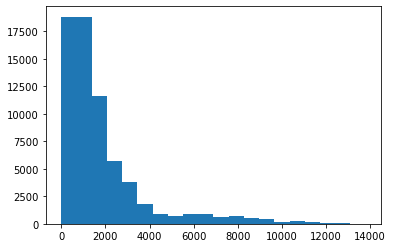

In [16]:
"""
use pandas to apply the distance calculation function across 
the routes dataframe
remember in dataframe axis = 0 for index and axis = 1 for columns
"""
route_lengths = routes.apply(calc_dist, axis=1)


"""
series of route lengths, we can create a histogram, 
which will bin the values into ranges and count how many 
routes fall into each range
"""
plt.hist(route_lengths, bins=20)
plt.show()

# Mapping Flight Data

If help loading PROJ_LIB or basemap is needed see on of the following resorces

https://stackoverflow.com/questions/52911232/basemap-library-using-anaconda-jupyter-notebooks-keyerror-proj-lib

https://stackoverflow.com/questions/40374441/python-basemap-module-impossible-to-import

https://github.com/matplotlib/basemap/issues/419

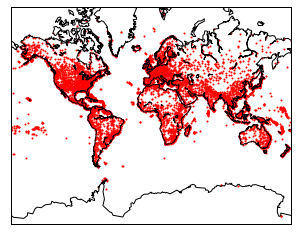

In [18]:
"""
Make a map that shows airports all over the world. 
We can do this with the basemap extension to matplotlib. 
This enables drawing world maps and adding points.
"""

# Import the basemap package
os.environ['PROJ_LIB'] = '~/miniconda3/envs/tutorials/share/proj'
from mpl_toolkits.basemap import Basemap

#Create a map on which to draw.  We're using a mercator projection, and showing the whole world.
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

# Draw coastlines, and the edges of the map.
m.drawcoastlines()
m.drawmapboundary()

# Convert latitude and longitude to x and y coordinates
x, y = m(list(airports["longitude"].astype(float)), list(airports["latitude"].astype(float)))

# Use matplotlib to draw the points onto the map.
m.scatter(x,y,1,marker='o',color='red')

# Show the plot.
plt.show()

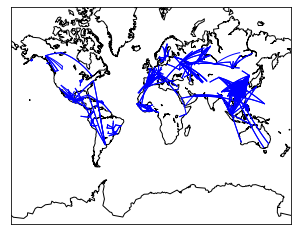

In [19]:
#Now let's map flight routes - but only for 1000 routes 
#to keep the clutter down

# Make a base map with a mercator projection.  Draw the coastlines.
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()

# Iterate through the first 1000 rows.
for name, row in routes[:1000].iterrows():
    try:
        # Get the source and dest airports.
        source = airports[airports["id"] == int(row["source_id"])].iloc[0]
        dest = airports[airports["id"] == int(row["dest_id"])].iloc[0]
        # Don't draw overly long routes.
        if abs(float(source["longitude"]) - float(dest["longitude"])) < 90:
            # Draw a great circle between source and dest airports.
            m.drawgreatcircle(float(source["longitude"]), float(source["latitude"]), float(dest["longitude"]), float(dest["latitude"]),linewidth=1,color='b')
    except (ValueError, IndexError):
        pass
    
# Show the map.
plt.show()


Note there are potentially better ways to plot/map.
Check out:<br>
seaborn <br>
bokeh <br>
folium